# **OPSD Analysis**

## 1. Download IMDB Dataset
**Note:** If you can't download using gdown due to limited number of downloads, please download it manually and upload it to your drive, then copy it from the drive to colab.

In [1]:
# Dataset: https://drive.google.com/file/d/1AgxgBt8vArpdxheUqGlbZHqDe_Jatmxv/view?usp=share_link
!gdown 1AgxgBt8vArpdxheUqGlbZHqDe_Jatmxv

Downloading...
From: https://drive.google.com/uc?id=1AgxgBt8vArpdxheUqGlbZHqDe_Jatmxv
To: /content/opsd_germany_daily.csv
100% 222k/222k [00:00<00:00, 25.1MB/s]


## 2. Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load and view dataset

In [3]:
dataset_path = './opsd_germany_daily.csv'
opsd_daily = pd.read_csv(dataset_path)
opsd_daily.sample(2)

,Date,Consumption,Wind,Solar,Wind+Solar
2377,2012-07-05,1358.012,60.654,128.246,188.9
2118,2011-10-20,1465.479,114.123,NaN,NaN


In [4]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [5]:
opsd_daily.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


## 3. Time-based indexing

In [6]:
opsd_daily = pd.read_csv(dataset_path, index_col='Date', parse_dates=True)

opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Day'] = opsd_daily.index.day_name()

opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [7]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [8]:
new_opsd_df = opsd_daily.loc['2012-02']
new_opsd_df.head(2)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday


## 4. Visualizing time series data

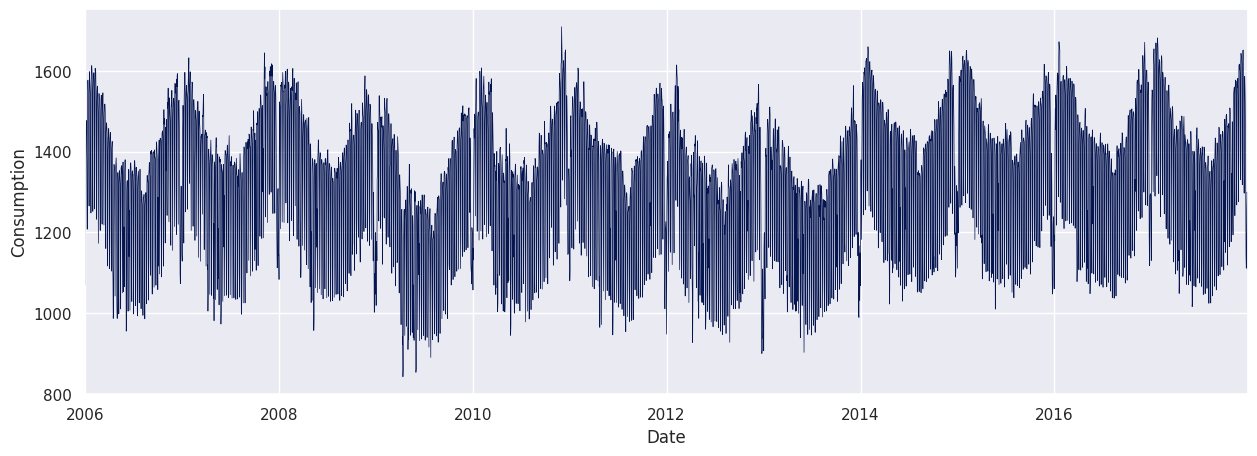

In [9]:
sns.set(rc={'figure.figsize':(15, 5)})
opsd_daily['Consumption'].plot(linewidth=0.5, color='#051550')
plt.ylabel('Consumption')
plt.show()

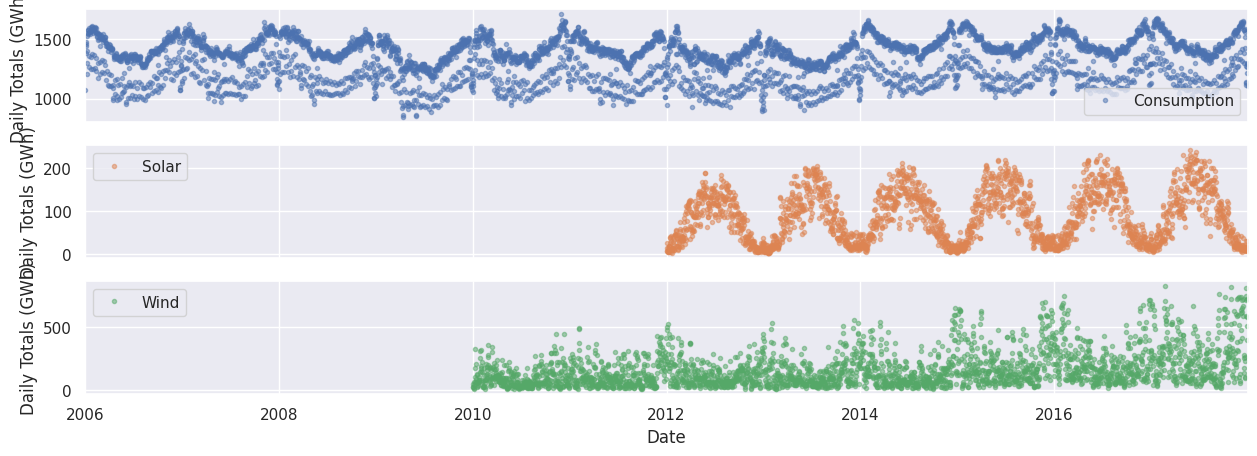

In [10]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = opsd_daily[cols_plot].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(15, 5),
    subplots=True
)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

plt.show()

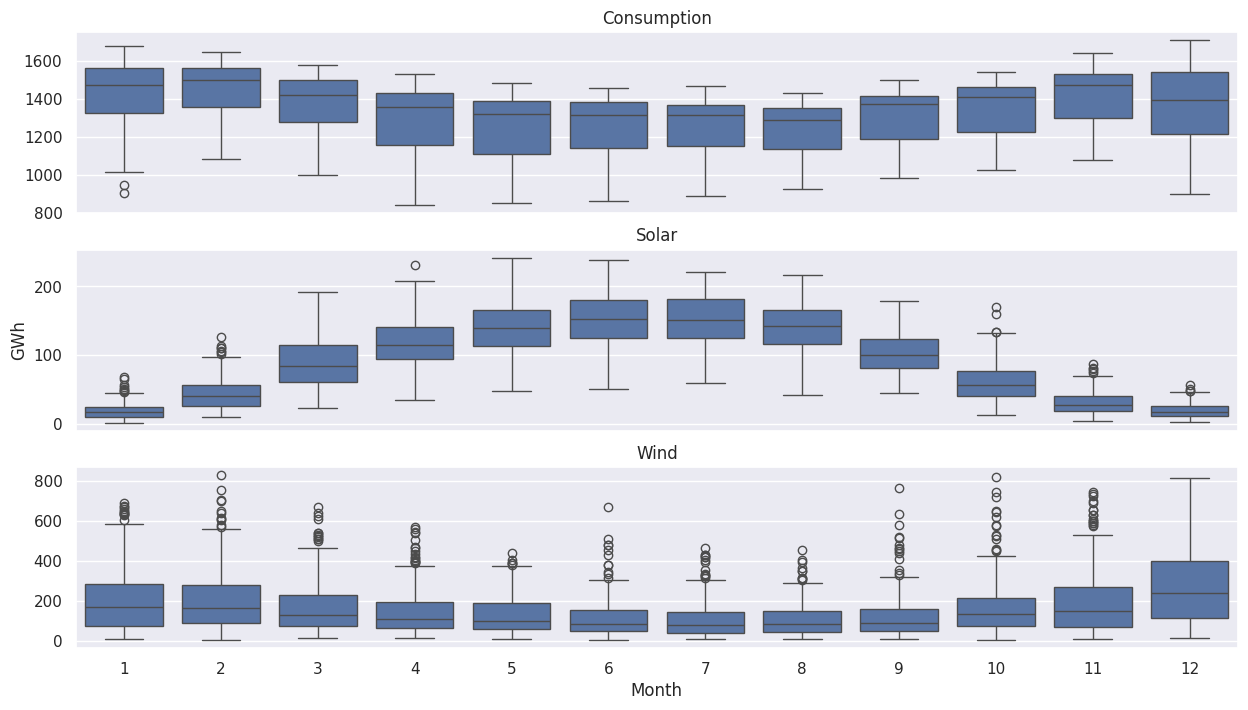

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(15, 8), sharex=True)
for name, ax in zip(cols_plot, axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

    if ax != axes[1]:
        ax.set_ylabel('')

## 5. Frequencies



In [12]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.date_range('2004-09-20', periods=8, freq='h')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [14]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-05', '2013-02-07'])
consum_sample = opsd_daily.loc[times_sample, ['Consumption']]
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-05,1400.332
2013-02-07,1457.147


In [15]:
consum_freq = consum_sample.asfreq('D')
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,1400.332,1400.332
2013-02-06,NaN,1400.332
2013-02-07,1457.147,1457.147


## 6. Resampling

In [16]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


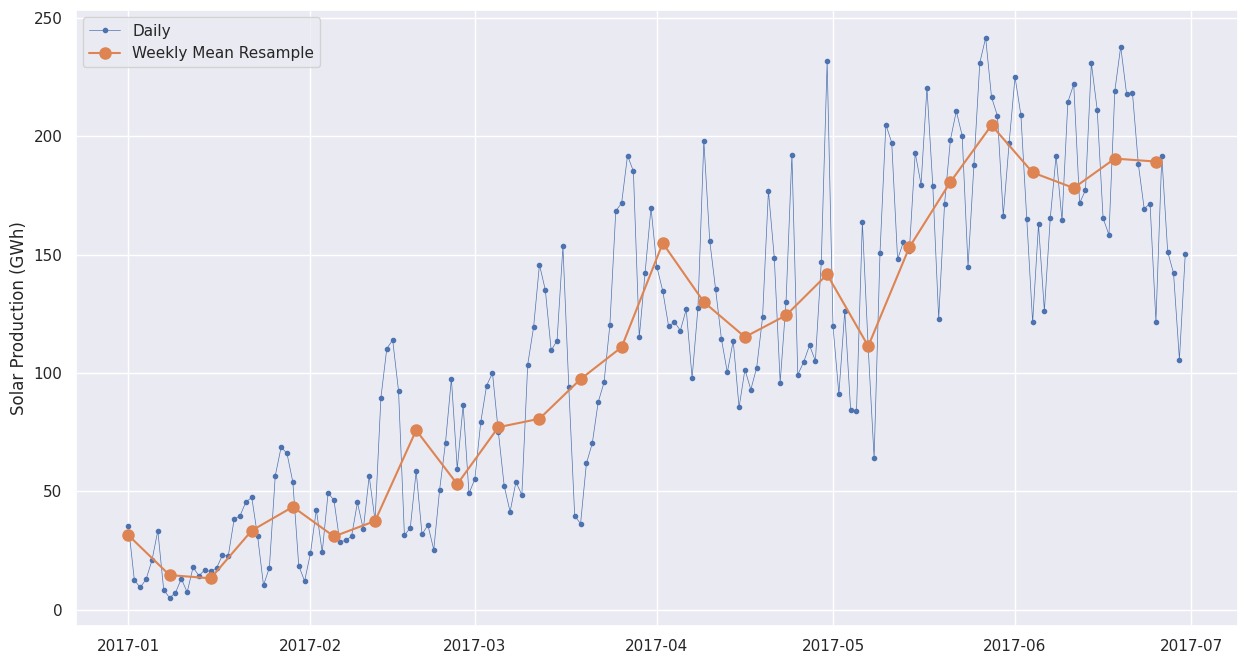

In [17]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

plt.show()

In [18]:
opsd_daily.dropna(inplace=True)

In [19]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_annual = opsd_daily[data_columns].resample('Y').sum(min_count=360)

opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2013,461241.06500,47137.663,29559.780,76697.443,0.166285
2014,500280.02800,51020.702,32349.800,83370.502,0.166648
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


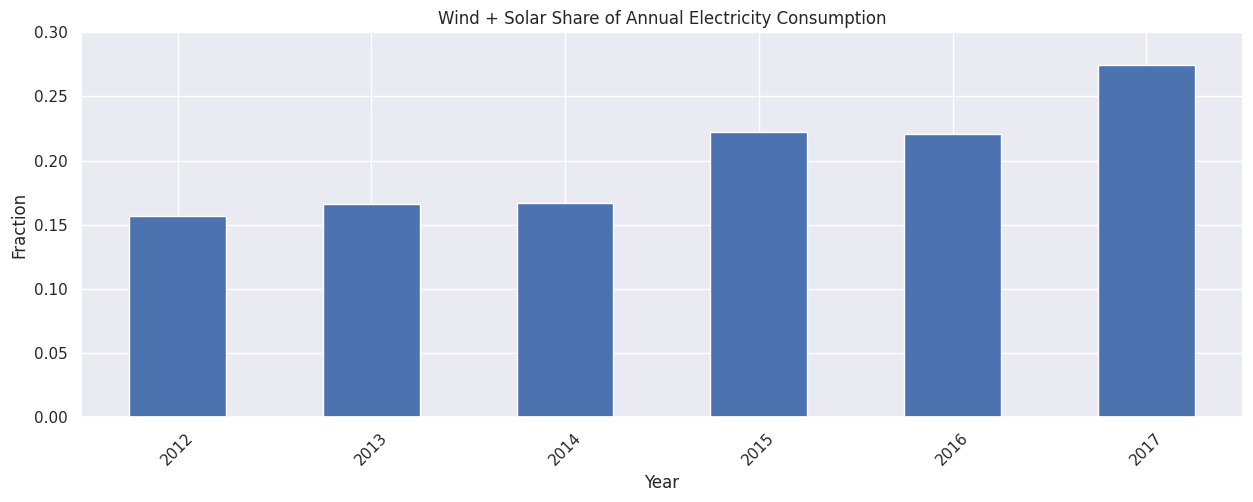

In [20]:
ax = opsd_annual.loc[:, 'Wind+Solar/Consumption'].plot.bar(color='C0')

ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=45)

plt.show()

## 7. Rolling windows

In [21]:
opsd_daily = pd.read_csv(dataset_path, index_col='Date', parse_dates=True)
opsd_daily[data_columns].head(8)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN


In [22]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(8)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN


## 8. Trends

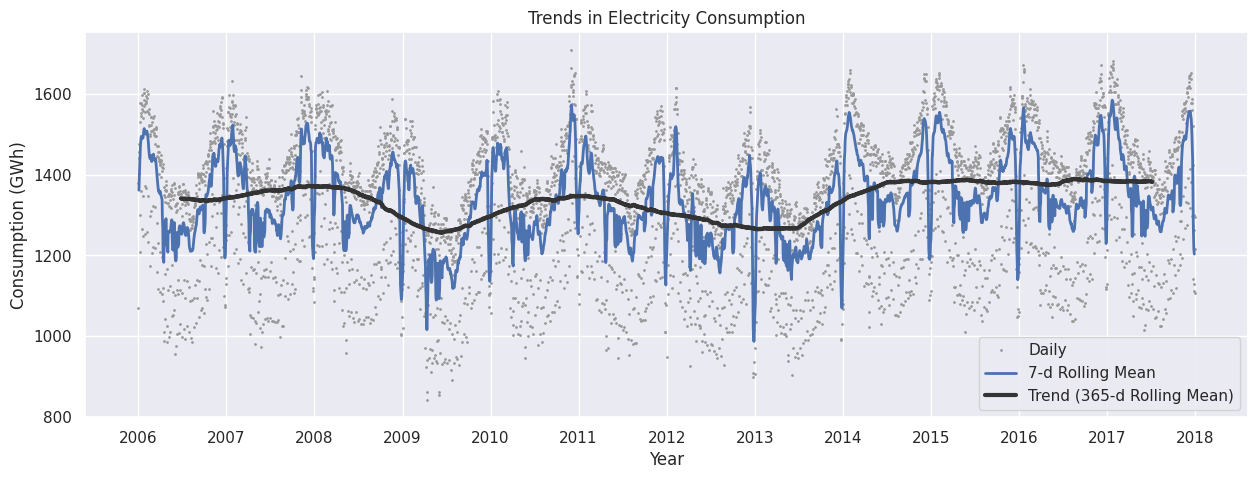

In [23]:
import matplotlib.dates as mdates

opsd_365d = opsd_daily[data_columns].rolling(
    window=365,
    center=True,
    min_periods=360
).mean()

fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

plt.show()

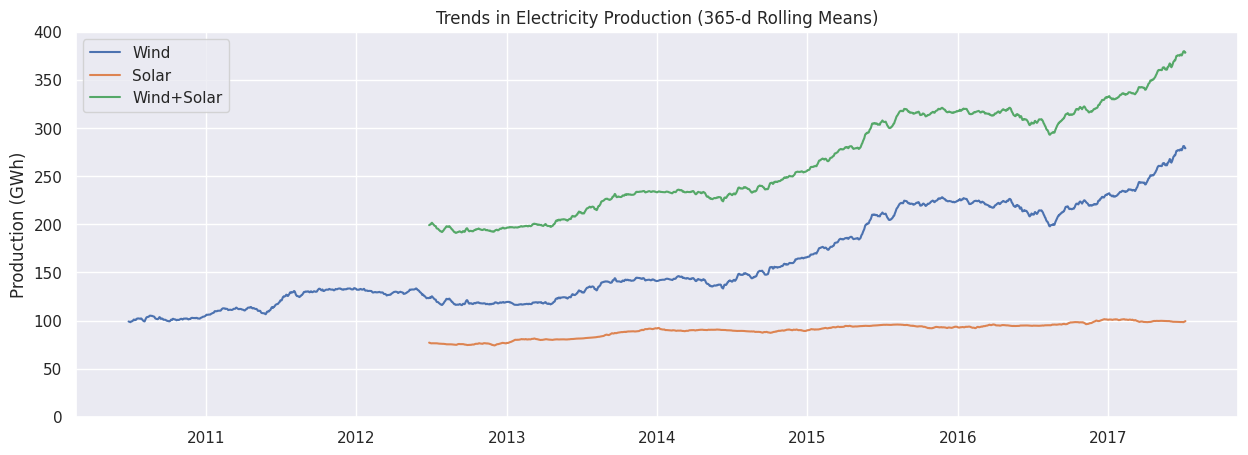

In [24]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')

plt.show()